In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans 

In [51]:
df = pd.read_csv('housing.csv')
df = df.iloc[1400:1500]
data_for_clustering = df[["MedInc","MedHouseVal"]]
data_for_clustering

,MedInc,MedHouseVal
1400,4.7386,1.864
1401,4.5893,1.900
1402,5.0672,2.430
1403,4.8702,2.356
1404,5.0445,1.962
...,...,...
1495,6.0704,2.680
1496,6.3809,2.736
1497,6.8145,3.392
1498,7.5898,3.302


In [52]:
x = data_for_clustering.values
x

array([[4.7386, 1.864 ],
       [4.5893, 1.9   ],
       [5.0672, 2.43  ],
       [4.8702, 2.356 ],
       [5.0445, 1.962 ],
       [3.9816, 1.82  ],
       [4.175 , 1.694 ],
       [2.5459, 1.793 ],
       [2.5268, 2.357 ],
       [3.5057, 2.051 ],
       [2.892 , 2.208 ],
       [5.0761, 2.332 ],
       [4.725 , 2.321 ],
       [4.475 , 2.657 ],
       [6.0265, 2.479 ],
       [6.1922, 2.732 ],
       [3.2484, 0.911 ],
       [3.2   , 1.345 ],
       [4.125 , 1.362 ],
       [6.1359, 2.5   ],
       [2.8043, 0.875 ],
       [1.8229, 1.375 ],
       [3.7333, 1.364 ],
       [2.3462, 0.75  ],
       [1.3894, 1.563 ],
       [2.3152, 1.406 ],
       [5.7295, 1.783 ],
       [4.5707, 1.759 ],
       [3.8897, 1.399 ],
       [3.6042, 1.382 ],
       [4.6375, 1.782 ],
       [4.9022, 1.693 ],
       [4.45  , 1.619 ],
       [4.59  , 1.666 ],
       [3.4531, 1.489 ],
       [3.5179, 1.655 ],
       [4.317 , 1.94  ],
       [5.1118, 2.269 ],
       [5.1021, 2.028 ],
       [3.6449, 2.115 ],


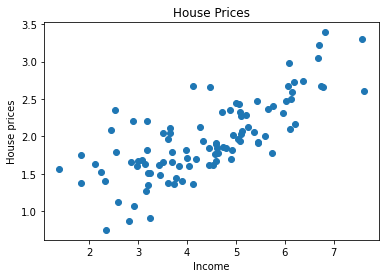

In [53]:
plt.scatter(data_for_clustering.MedInc.to_list() , data_for_clustering.MedHouseVal.to_list())
plt.title("House Prices")
plt.xlabel("Income")
plt.ylabel("House prices")
plt.show()

In [54]:
def get_wcss(X):
    wcss_list= []
    for i in range(1, 11):  
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
        kmeans.fit(X)  
        wcss_list.append(kmeans.inertia_)  
    
    return wcss_list

C:\Users\vatsa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[212.67648267190006, 74.57729755995962, 40.00232767936331, 27.520531769942124, 22.102294138198378, 18.442280411841995, 14.809002254054407, 12.558447298241122, 11.467933900351197, 10.353005105846478]


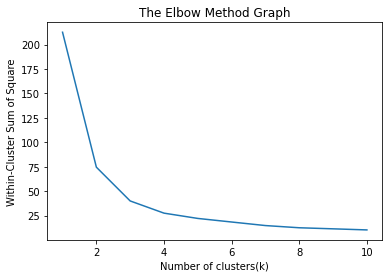

In [55]:
wcss = get_wcss(x)
print(wcss)
plt.plot(range(1, 11), wcss)  
plt.title('The Elbow Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('Within-Cluster Sum of Square')  
plt.show()

In [56]:
def clustering_kmeans(X,k):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state= 42)  
    y= kmeans.fit_predict(X)  
    return kmeans,y

In [57]:
k_means, y = clustering_kmeans(x, 3)

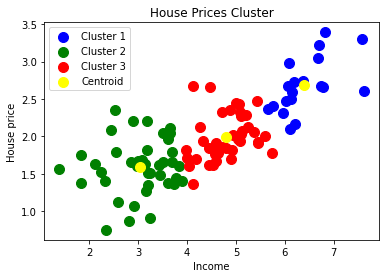

In [58]:
plt.scatter(x[y == 0, 0], x[y == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')  
plt.scatter(x[y == 1, 0], x[y == 1, 1], s = 100, c = 'green', label = 'Cluster 2') 
plt.scatter(x[y== 2, 0], x[y == 2, 1], s = 100, c = 'red', label = 'Cluster 3')  
# plt.scatter(x[y == 3, 0], x[y == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') 
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroid')   
plt.title('House Prices Cluster')  
plt.xlabel('Income')  
plt.ylabel('House price')  
plt.legend()  
plt.show()  